<a href="https://colab.research.google.com/github/erictleung/statistical-rethinking-book-club/blob/main/Python/py_chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_04.ipynb

In [12]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats

from scipy.interpolate import griddata

In [13]:
# Settings
%matplotlib inline

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
az.rcParams["stats.ci_prob"] = 0.89  # sets default credible interval used by arviz

## Simulation of normal distribution by addition

In [14]:
# R code 4.1
step_rng = np.random.default_rng(1234)

steps = 16
repetitions = 1000
show_steps = [4, 8, 16]
x = np.zeros([steps + 1, repetitions])
for i in range(x.shape[1]):
    x[1:, i] = np.cumsum(step_rng.uniform(-1, 1, steps))

In [15]:
# Simulated cumulative sum of random coin flips
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95339953,  0.4715154 ,  0.47163799, ...,  0.56460275,
        -0.97997979,  0.98772738],
       [ 0.713791  , -0.08297729,  1.31572442, ...,  1.53291983,
        -0.88681198,  0.87562507],
       ...,
       [ 1.09061524, -1.41814258,  3.45454175, ...,  3.6007333 ,
        -0.21597011,  1.21165326],
       [ 1.44037787, -0.70116171,  3.19555861, ...,  2.65359793,
         0.33863431,  0.86092861],
       [ 1.76012656, -0.85056501,  3.16089748, ...,  2.45679564,
        -0.49109628,  0.00405677]])

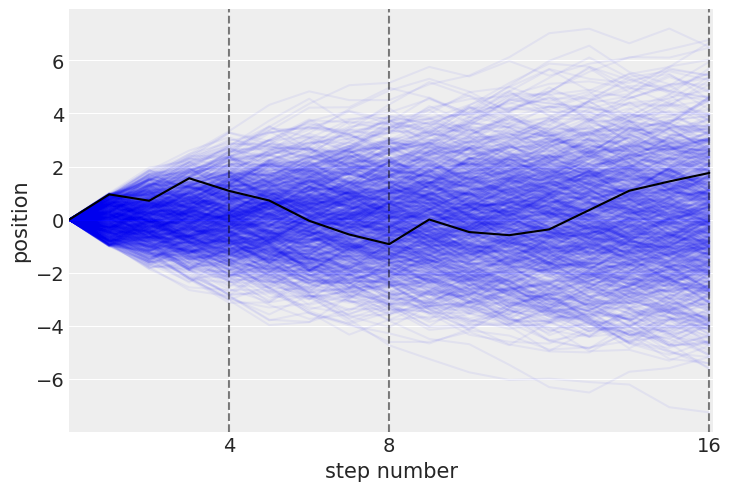

In [16]:
# R code 4.1
fig, ax = plt.subplots()
plt.plot(range(0, steps + 1), x[:, :], c="b", alpha=0.05)
plt.plot(range(0, steps + 1), x[:, 0], c="k")
for step in show_steps:
    plt.axvline(step, linestyle="--", c="k", alpha=0.5)

plt.xlabel("step number")
plt.ylabel("position")
ax.set_xticks(show_steps)
plt.xlim(0, step + 0.1)
plt.show()

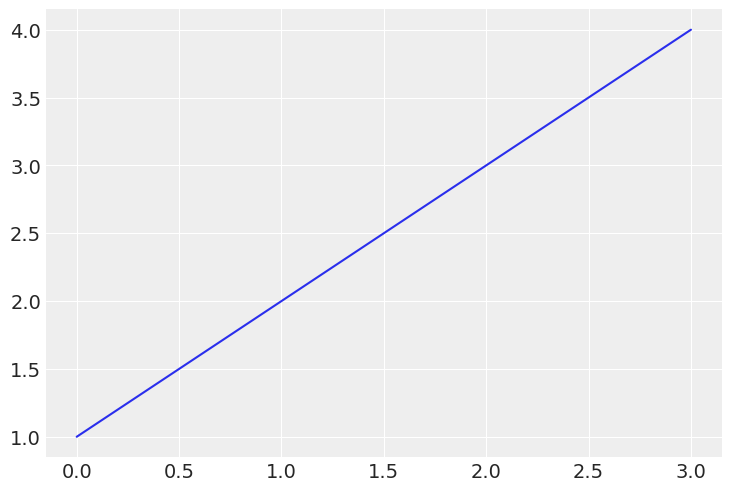

In [17]:
# R code 4.1
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharex=True)

for step, ax in zip(show_steps, axs):
    az.plot_kde(x[step, :], bw=0.01, ax=ax)
    ax.set_title(f"{step} steps")
    ax.set_ylabel("Density")
    ax.set_xlabel("Position")
    ax.set_xlim(-6, 6)
    ax.set_xticks([-6, -3, 0, 3, 6])